In [7]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = glob(r"C:\Users\bluecom013\Downloads\그랜드코리아레저(주)_영업점별 고객 식음료 주문 내역_20230630.csv")
df = pd.read_csv(path[0])

df.head()

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31


In [29]:
df_list=list(df.columns)
#df.info()

print(df_list)

['지급일자', '영업점코드', '영업점명', '식음메뉴그룹코드', '식음메뉴그룹명', '식음메뉴코드', '식음메뉴명(한글)', '식음메뉴명(영문)', '성별', '고객여권발급국가코드', '고객여권발급국가명', '주문수량']


In [9]:
#결측치 확인
df.isnull().sum()

지급일자               0
영업점코드              0
영업점명               0
식음메뉴그룹코드           0
식음메뉴그룹명            0
식음메뉴코드             0
식음메뉴명(한글)          0
식음메뉴명(영문)     941904
성별            189216
고객여권발급국가코드    189182
고객여권발급국가명     189324
주문수량               0
dtype: int64

c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45684 (\N{HANGUL SYLLABLE NYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) mi

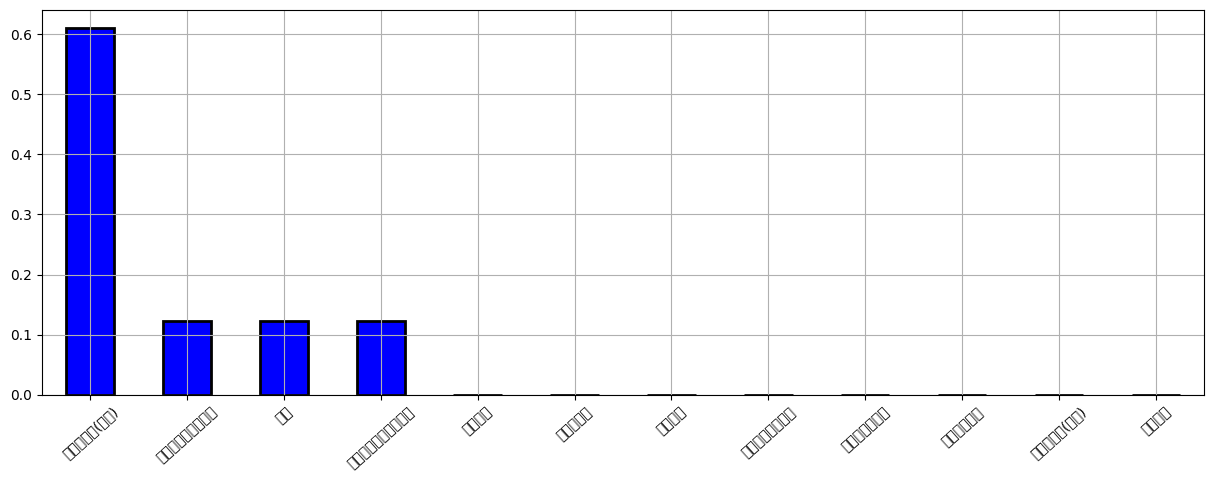

In [10]:
df.isna().mean().sort_values(ascending=False).plot( kind='bar', figsize=(15,5),  grid=True, color='blue', edgecolor='black', linewidth=2, rot=42)

plt.show()
#sns.heatmap(df.isnull(),cbar=True)


In [11]:
#최빈값 확인
df['성별'].value_counts()

성별
M    1017112
F     338680
Name: count, dtype: int64

In [12]:
#각 열 최빈값으로 채우기
'''
for column in df.columns:
    mode_value = df[column].mode()[0]  # 최빈값
    df[column].fillna(mode_value, inplace=True)
'''
df['성별'].fillna(df['성별'].mode()[0], inplace=True)
df.isnull().sum()
df['성별'].value_counts()

성별
M    1206328
F     338680
Name: count, dtype: int64

In [13]:
df.sort_values('주문수량', ascending=False).head(10)

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
1446287,2023-01-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2911
1202737,2022-12-20,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
1008673,2022-12-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
647787,2023-01-03,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2881
1447299,2023-01-17,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
1105883,2022-11-16,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
83794,2020-08-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2593
1440888,2022-07-06,CX,코엑스,2011,음료,2057,펩시콜라,NaN,M,NaN,NaN,2560
1440729,2022-01-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2441
644530,2021-12-22,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2436


In [14]:
print(df['영업점명'].value_counts())
print('-'*20)
print(df['식음메뉴명(한글)'].value_counts())
print('-'*20)
print(df['성별'].value_counts())
print('-'*20)
print(df['고객여권발급국가명'].value_counts())

영업점명
코엑스    610732
드래곤    532755
롯데     401521
Name: count, dtype: int64
--------------------
식음메뉴명(한글)
계절과일(VIP)                         33083
생맥주                               25995
펩시콜라                              16658
흑후추스테이크                           13740
미에로화이바                            13459
                                  ...  
문배술                                   1
베이컨토마토샌드위치                            1
잔치국수                                  1
GOLD EVENT 메비우스스카이블루6MG(4500원)        1
GOLD EVENT 히츠 퍼플라벨(4500원)             1
Name: count, Length: 1101, dtype: int64
--------------------
성별
M    1206328
F     338680
Name: count, dtype: int64
--------------------
고객여권발급국가명
중국            346182
일본            173569
미국            165226
대한민국(영주권자)    158386
대만            119346
               ...  
볼리비아               2
마케도니아 공화국          1
체코공화국              1
슬로바키아              1
슬로베이아              1
Name: count, Length: 106, dtype: int64


In [65]:
def 주문수량(A:list):
    print(type(A))
    print(df.groupby(A)['주문수량'].sum())
    print(type(A))
    

In [68]:
주문수량('지급일자')

<class 'str'>
지급일자
2019-01-01    16876
2019-01-02    14807
2019-01-03    14841
2019-01-04    15074
2019-01-05    14539
              ...  
2023-06-26    12010
2023-06-27    11210
2023-06-28    10666
2023-06-29    11460
2023-06-30    13553
Name: 주문수량, Length: 1525, dtype: int64
<class 'str'>


In [24]:
주문수량('식음메뉴명(한글)')

식음메뉴명(한글)
(1인분)             8818
(BAR)               84
(NO ICE)          1406
(NO SUGAR)        3972
(더블)               623
                 ...  
히츠 엠버라벨(아이코스)     4094
히츠 퍼플라벨(아이코스)    13548
히츠그린                88
히츠실버                 4
힘내삼드링크세트(VIP)     6685
Name: 주문수량, Length: 1101, dtype: int64


In [31]:
주문수량(df_list[10])

고객여권발급국가명
그레나다            14
그리스             10
나이지리아           25
남아프리카 공화국       77
네덜란드          3626
             ...  
핀랜드             11
필리핀          27737
헝가리             27
호주           36888
홍콩            9765
Name: 주문수량, Length: 106, dtype: int64


In [42]:
#주문수량([df_list[2],df_list[-2]])
df.groupby([df_list[2],df_list[-2]])['주문수량'].sum()

영업점명  고객여권발급국가명
드래곤   그레나다             6
      그리스              4
      나이지리아           15
      남아프리카 공화국       34
      네덜란드          2349
                   ...  
코엑스   핀랜드              4
      필리핀           5092
      헝가리             26
      호주           31386
      홍콩            8255
Name: 주문수량, Length: 251, dtype: int64

In [66]:
print(df.groupby(['영업점명'])['주문수량'].sum())


영업점명
드래곤    5489744
롯데     2020134
코엑스    5067045
Name: 주문수량, dtype: int64


In [71]:
df.dtypes

지급일자          object
영업점코드         object
영업점명          object
식음메뉴그룹코드       int64
식음메뉴그룹명       object
식음메뉴코드         int64
식음메뉴명(한글)     object
식음메뉴명(영문)     object
성별            object
고객여권발급국가코드    object
고객여권발급국가명     object
주문수량           int64
dtype: object

In [72]:
import numpy as np

# 난수 생성에 필요한 평균과 표준편차
mean = 0
std_dev = 1

# 정규분포에 맞는 난수 1000개 생성
random_numbers = np.random.normal(mean, std_dev, 1000)

# 생성된 난수 확인
print(random_numbers)


[ 3.08891203e-01  1.43183772e+00 -1.29817908e+00 -2.10659737e+00
  7.22148029e-01  5.04796988e-01  1.08604281e+00  6.00450431e-01
 -4.57249744e-01  4.15174299e-01 -1.73500866e-01 -2.71224534e-01
 -7.99163251e-01 -6.98228908e-01  2.30356531e-01 -4.53752445e-01
 -1.02125231e+00 -8.63199360e-01  5.97397539e-02  9.70741164e-01
  9.79519315e-03 -3.57473779e-01 -4.33131457e-01 -2.65629346e+00
 -4.60291158e-01  1.70018725e+00 -1.51265657e+00 -1.85973287e+00
 -6.89185206e-01  1.15806554e+00  7.40336702e-01  1.23989544e+00
 -8.57952752e-02  2.14652773e-01  5.54181974e-01  5.50155544e-01
  1.10190684e+00  1.46491425e+00 -4.00173046e-01 -4.83241801e-01
  2.84168128e-01  1.01416203e+00 -1.53163245e+00  1.70903472e+00
  1.98223386e+00 -1.81274573e+00  2.25204116e-01  2.56535473e-01
  2.50859303e+00  1.09343916e-01 -1.61837227e+00 -1.56360189e-01
 -8.00171886e-01 -2.80251526e-01 -2.33620340e+00  4.84450393e-01
 -2.22067328e-01  1.58344046e+00  7.91206606e-01  3.85164677e-01
 -1.06570520e+00 -3.38960

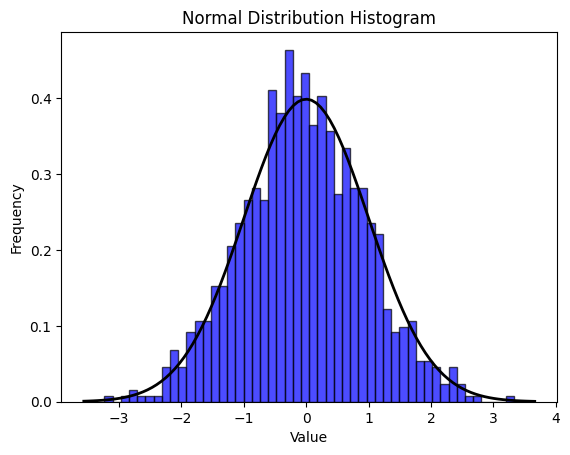

   Random Numbers
0        1.162396
1        0.631014
2       -0.205979
3        0.994549
4       -0.945642
   Random Numbers
0        1.162396
1        0.631014
2       -0.205979
3        0.994549
4       -0.945642


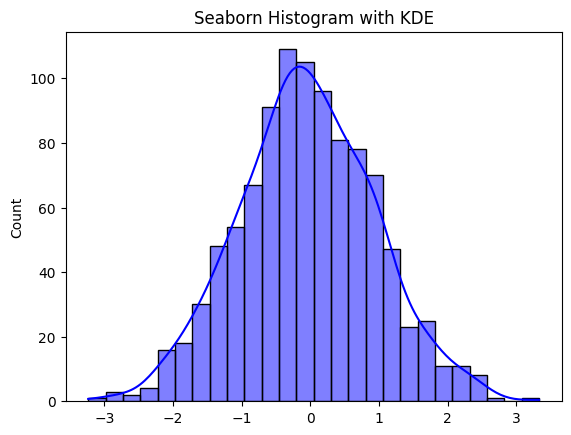

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 난수 생성에 필요한 평균과 표준편차
mean = 0
std_dev = 1

# 정규분포에 맞는 난수 1000개 생성
random_numbers = np.random.normal(mean, std_dev, 1000)

# 히스토그램 그리기
plt.hist(random_numbers, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Normal Distribution Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 정규분포표 그리기
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean)/std_dev)**2)
plt.plot(x, p, 'k', linewidth=2)

# 플롯 보이기
plt.show()

# 데이터를 pandas 데이터프레임으로 변환하여 출력
df = pd.DataFrame(random_numbers, columns=['Random Numbers'])
print(df.head())


# seaborn을 이용한 히스토그램과 정규분포표 그리기
sns.histplot(random_numbers, kde=True, color='blue')
plt.title('Seaborn Histogram with KDE')

# 데이터를 pandas 데이터프레임으로 변환하여 출력
df = pd.DataFrame(random_numbers, columns=['Random Numbers'])
print(df.head())

# 플롯 보이기
plt.show()

